# SYDE556/750 Assignment 4: Nengo and Dynamics

- Due Date: March 20th (midnight)
- Total marks: 10 (10% of final grade)
- Late penalty: 1 mark per day
- For this assignment, you must use Nengo, which can be downloaded from http://nengo.ai.
    - Feel free to look through the examples folder before doing this assignment.
- You can also use Nengo GUI if you'd like, see the nengo.ai website as well.

## 1) Building an ensemble of neurons

Make a new model and inside that model make an ensemble of neurons.  It should have 100 neurons, and represent a 1-dimensional space.  The intercepts should be between -1 and 1, and the maximum firing rates should be between 100Hz and 200Hz.  $\tau_{RC}$ should be 0.02s and $\tau_{ref}$ should be 0.002s.

Note: You don't need to run the model over time for this question.

1. [1 mark] Plot the tuning curves. Plot the representation accuracy plot ( 𝑥  and  𝑥̂   on the same plot). Compute and report the RMSE.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import nengo

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE with 100 neurons is 0.00486783


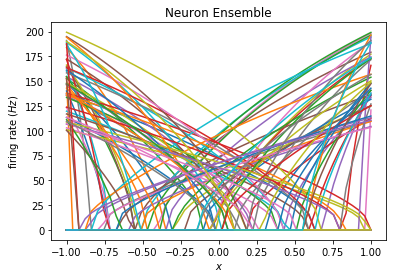

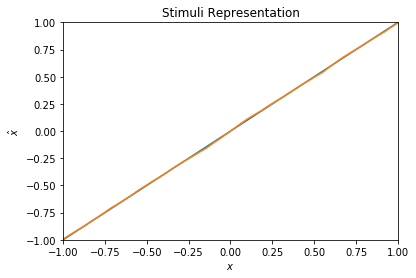

In [5]:
from nengo.utils.ensemble import tuning_curves
from nengo.dists import Uniform

N = 100
tau_rc, tau_ref = 0.02, 0.002

lif_model = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)

model = nengo.Network(label='1D Neuron Ensemble')

with model:
    neurons = nengo.Ensemble(N, dimensions=1,max_rates=Uniform(100,200), neuron_type = lif_model)
    connection = nengo.Connection(neurons, neurons)

sim = nengo.Simulator(model)

x, A = tuning_curves(neurons, sim)

plt.figure()
plt.plot(x, A)
plt.title('Neuron Ensemble')
plt.xlabel('$x$')
plt.ylabel('firing rate ($Hz$)')

# Plot representation
d = sim.data[connection].weights.T

#A_noisy = A + numpy.random.normal(scale=noise*numpy.max(A), size=A.shape)
xhat = np.dot(A, d)

plt.figure()
plt.title("Stimuli Representation")
plt.plot(x, x, label="x")
plt.plot(x, xhat, label="$\hat{x}$")
plt.xlabel('$x$')
plt.ylabel('$\hat{x}$')
plt.ylim(-1, 1)
plt.xlim(-1, 1)

print('RMSE with %d neurons is %g'%(N, np.sqrt(np.average((x-xhat)**2))))

2. [1 mark] What happens to the RMSE as the radius increases? Why? Provide four example points (i.e., RMSE at various radiuses). (Note: Nengo will automatically rescale the intercepts as the radius increases.)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE with 100 neurons at radius 2 is 0.00968196


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE with 100 neurons at radius 3 is 0.0162826


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE with 100 neurons at radius 4 is 0.0192091


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE with 100 neurons at radius 5 is 0.0204627


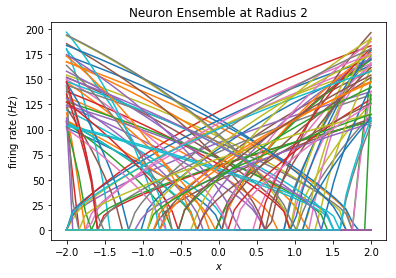

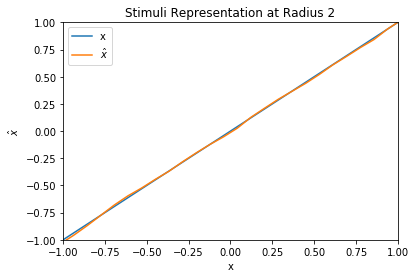

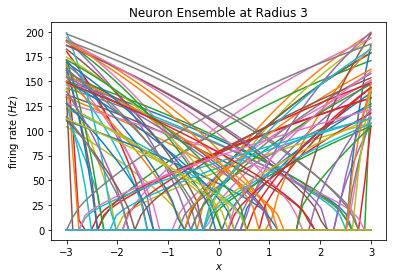

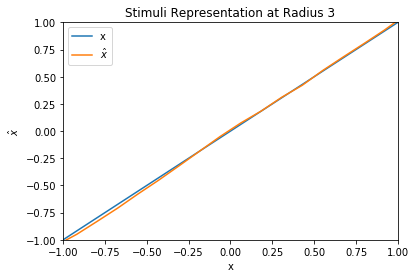

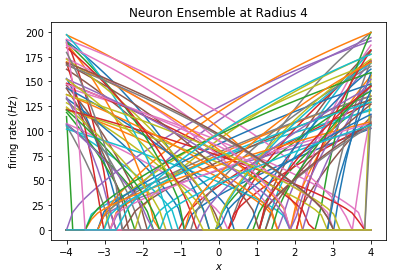

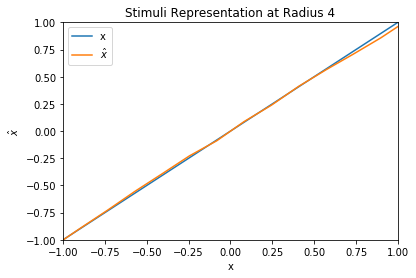

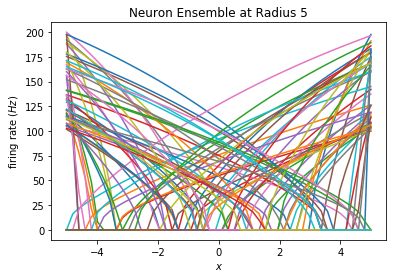

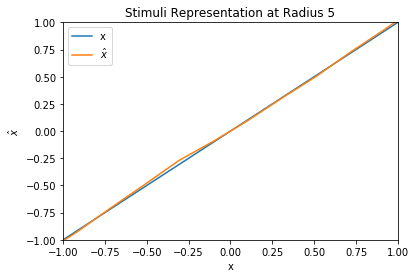

In [7]:
radii = [2,3,4,5]

for radius in radii:
    neurons.radius = radius
    
    # Simulate model
    sim = nengo.Simulator(model)
    # Plot tuning curves
    x, A = tuning_curves(neurons, sim)

    plt.figure()
    plt.plot(x, A)
    plt.title('Neuron Ensemble at Radius %d' % radius)
    plt.xlabel('$x$')
    plt.ylabel('firing rate ($Hz$)')

    # Plot representation
    d = sim.data[connection].weights.T
    #A_noisy = A + numpy.random.normal(scale=noise*numpy.max(A), size=A.shape)
    xhat = np.dot(A, d)

    plt.figure()
    plt.title('Stimuli Representation at Radius %d' % radius)
    plt.plot(x, x, label="x")
    plt.plot(x, xhat, label="$\hat{x}$")
    plt.xlabel('x')
    plt.ylabel('$\hat{x}$')
    plt.legend()
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)

    print('RMSE with %d neurons at radius %d is %g'%(N, radius, np.sqrt(np.average((x-xhat)**2))))

neurons.radius = 1

3. [0.5 marks] What happens to the RMSE and the tuning curves as $\tau_{ref}$ changes between 1-5ms? Show plots.  Why?